In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [3]:
from mnist import MNIST

In [4]:
mndata = MNIST(r'./data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
def oneHotEncoding(labels, k):
    '''
    Returns n by k matrix, where  n is the number of items and k is the number of categories.
    '''
    matrix = np.zeros([len(labels),k])
    matrix[[i for i in range(len(labels))], labels] = 1
    return matrix

Each image is a 28 by 28 array.

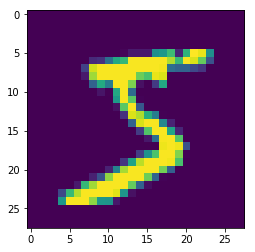

In [5]:
plt.imshow(X_train[0].reshape([28,28]))

In [6]:
def train(Xtrain_n_d, Y_n_k, regularization=10e-4):
    '''
    Returns the linear classifier W \in R^(d \cross k) that minimizes the regularized least square objective 
    '''
    return np.linalg.solve(Xtrain_n_d.T@Xtrain_n_d + regularization*np.identity(Xtrain_n_d.shape[1]),
                           Xtrain_n_d.T@Y_n_k)

In [9]:
def classify(W, xi):
    v = W.T@xi
    return v.tolist().index(max(v))

In [8]:
def predict(W_d_k, Xtest_m_d):
    return [classify(W_d_k, x_row) for x_row in Xtest_m_d]

In [7]:
def cError(predicted, actual):
    return np.sum(predicted == actual)/len(actual)

In [10]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [14]:
W_hat = train(X_train, oneHotEncoding(labels_train, 10))
print('Training Error: {}'.format(cError(predict(W_hat, X_train), labels_train)))
print('Test Error: {}'.format(cError(predict(W_hat, X_test), labels_test)))

Training Error: 0.8519833333333333
Test Error: 0.8533


In [16]:
def kCrossValidationSplit(data, labels, percentFirst):
    splitIndex = int(percentFirst*len(data))
    shuffledIndices = np.random.permutation(len(data))
    shuffledData = data[shuffledIndices] # shuffles on first index only
    shuffledLabels = labels[shuffledIndices]
    return {'data_train': shuffledData[:splitIndex],
            'data_test': shuffledData[splitIndex:],
            'labels_train': shuffledLabels[:splitIndex], 
            'labels_test': shuffledLabels[splitIndex:],
            'indices': shuffledIndices}

In [15]:
make_plot=False
if make_plot:
    d = len(X_train[0])
    kSplit = kCrossValidationSplit(X_train, labels_train, .8)
    saveData = {'p':[], 'training_error': []}
    pValues = [a for a in range(25,500,25)]
    pValues.extend([a for a in range(500,3001,250)])

    for p in pValues:
        b = np.random.rand(p)*2*np.pi
        G = np.sqrt(.1)*np.random.randn(p,d)

        Wp_hat = train(np.array([np.cos(G@x+b) for x in kSplit['data_train']]), oneHotEncoding(kSplit['labels_train'], 10))
        ktest_predict = predict(Wp_hat, np.array([np.cos(G@x+b) for x in kSplit['data_test']]))
        saveData['p'].append(p)
        saveData['training_error'].append(cError(ktest_predict, kSplit['labels_test']))
        del(Wp_hat,ktest_predict)

    ind = np.argsort(saveData['p'])
    plt.plot([saveData['p'][i] for i in ind],[saveData['training_error'][i] for i in ind], lw=3)
    plt.grid(True)
    plt.xlabel('p')
    plt.ylabel('Classification Test Error')
    plt.ylim([0,1])
    plt.savefig(r'./data/plot_p5.png')

In [ ]:
def hoeffdingsCI(confidence, testSize):
    return np.sqrt(np.log(2/(1-confidence))/2/testSize)
conf = hoeffdingsCI(0.95, len(labels_test))

p = 2000
d = len(X_train[0])
b = np.random.rand(p)*2*np.pi
G = np.sqrt(.1)*np.random.randn(p,d)

Wp_hat = train(np.array([np.cos(G@x+b) for x in X_train]),
               oneHotEncoding(labels_train, 10))
test_predict = predict(Wp_hat, np.array([np.cos(G@x+b) for x in X_test]))
del(Wp_hat)

error = cError(test_predict, labels_train)
print('E_test={} +/- ConfidenceInterval={}'.format(hoeffdingsCI(0.95, len(labels_test))))

In [258]:
hoeffdingsConfidenceInterval(0.95, len(labels_test))

0.013581015157406192